## The point of this project is to find the optimal strategy for a player playing the game of Pig Solitare.  

### In the below section, we will create a number of different pig classes with differest strategies for deciding whether or not to roll again.  We hope through a process of trial and error we can find the optimal pig solitare strategy

### We start by using pigs that roll a set number of times

In [2]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class Four_Rolls_Pig:
    def __init__(self):
        self.score = 0
        self.roll_count =3
    def roll_again(self):
        if self.roll_count > 0:
            self.roll_count -= 1
            return True
        else:
            return False
        
class Five_Rolls_Pig:
    def __init__(self):
        self.score = 0
        self.roll_count =4
    def roll_again(self):
        if self.roll_count > 0:
            self.roll_count -= 1
            return True
        else:
            return False
        
class Six_Rolls_Pig:
    def __init__(self):
        self.score = 0
        self.roll_count =5
    def roll_again(self):
        if self.roll_count > 0:
            self.roll_count -= 1
            return True
        else:
            return False

class Seven_Rolls_Pig:
    def __init__(self):
        self.score = 0
        self.roll_count =6
    def roll_again(self):
        if self.roll_count > 0:
            self.roll_count -= 1
            return True
        else:
            return False
        
class Eight_Rolls_Pig:
    def __init__(self):
        self.score = 0
        self.roll_count =7
    def roll_again(self):
        if self.roll_count > 0:
            self.roll_count -= 1
            return True
        else:
            return False

### Next, we will create pig classes that have a different probability of choosing to roll again

In [4]:
class Fifty_Percent_Pig:
    def __init__(self):
        self.score = 0
    def roll_again(self):
        random_number = random.randint(1,2)
        if random_number == 1:
            return True
        else:
            return False
        
class Seventy_Percent_Pig:
    def __init__(self):
        self.score = 0
    def roll_again(self):
        random_number = random.randint(1,10)
        if random_number <= 7:
            return True
        else:
            return False

class Eighty_Percent_Pig:
     def __init__(self):
         self.score = 0
     def roll_again(self):
         random_number = random.randint(1,10)
         if random_number <= 8:
             return True
         else:
             return False
            
class Ninety_Percent_Pig:
     def __init__(self):
         self.score = 0
     def roll_again(self):
         random_number = random.randint(1,10)
         if random_number <= 9:
             return True
         else:
             return False

### Finally, we have our pig which we have found to have the highest average points/turn over many trials

#### This pig has the strategy of choosing to roll if its turn score is below 20, but decides to hold if it is greater than or equal to 20

#### We found this using a little bit of math.  We know that the true goal of the game is to not roll a 1, which has a 1/5 chance of happening.  We also know that the average score of a non-losing roll is 4 because (6+5+4+3+2)/5 = 4.  Because you should get 5 winning rolls for every losing one, the best strategy is to hold at 5 x 4 =20

#### It should be noted that although this is the best stable strategy for a turn, there are other iterations of the pig solitare game where 2 players play against one another until one player crosses a certain points threshold.  The optimal strategy in this game is much more complex than the "hold at 20" rule and is dependent on various factors. To read more about this topic you can go to this 2004 Gettysburg College paper http://cupola.gettysburg.edu/cgi/viewcontent.cgi?article=1003&context=csfac

In [21]:
class Optimal_Pig:
     def __init__(self):
         self.score = 0
     def roll_again(self):
         if self.score < 20:
             return True
         else:
             return False

### Now let's make a few more pigs with near optimal strategy, but not quite

In [22]:
class Optimal_Pig__Plus_One:
     def __init__(self):
         self.score = 0
     def roll_again(self):
         if self.score < 21:
             return True
         else:
             return False
        
class Optimal_Pig_Minus_One:
     def __init__(self):
         self.score = 0
     def roll_again(self):
         if self.score < 19:
             return True
         else:
             return False
        
class Optimal_Pig_Minus_Two:
     def __init__(self):
         self.score = 0
     def roll_again(self):
         if self.score < 18:
             return True
         else:
             return False

### Now, we will construct the functions necessary to play the game Pig Solitare

#### Remember the rules: A player rolls a 6-sided die, if they roll a 1, their turn is over, if they roll a 2-6, that score is added to their turn score.  The player then has the choice to either take the points they already have or roll again.  If they roll a 1, they lose all the points they have aquired this turn and their turn score = 0.  This is repeated until the player either rolls a 1 or decides to hold.

In [23]:
def roll_dice():
    dice_roll = random.randint(1,6)
    return dice_roll

def play_game(pig):
    turn_over = False
    dice_score = roll_dice()
    if dice_score == 1:
        turn_over = True
    else:
        pig.score += dice_score
        decide_to_roll_again = pig.roll_again()
        while not turn_over and decide_to_roll_again:
            dice_score = roll_dice()
            if dice_score == 1:
                turn_over = True
                pig.score = 0
            else:
                pig.score += dice_score
                decide_to_roll_again = pig.roll_again()

## Now, we create a function to simulate many trials and that can accomodate our diverse types of pig players

In [24]:
def simulate_trials(trials, pig):
    trial_results = []
    while trials > 0:
        pig_player = pig
        play_game(pig_player)
        trial_results.append(pig_player.score)
        pig_player.score = 0
        trials -= 1
    return sum(trial_results)/len(trial_results)

### First we need to instantiate many pig objects to represent our different players

In [25]:
four_rolls_pig = Four_Rolls_Pig()
five_rolls_pig = Five_Rolls_Pig()
six_rolls_pig = Six_Rolls_Pig()
seven_rolls_pig = Seven_Rolls_Pig()
fifty_percent_pig = Fifty_Percent_Pig()
seventy_percent_pig = Seventy_Percent_Pig()
eighty_percent_pig = Eighty_Percent_Pig()
ninety_percent_pig = Ninety_Percent_Pig()
optimal_pig = Optimal_Pig()
optimal_pig_plus_one = Optimal_Pig__Plus_One()
optimal_pig_minus_one = Optimal_Pig_Minus_One()
optimal_pig_minus_two = Optimal_Pig_Minus_Two()

### Now we play the game for each pig and a large number of trials

In [26]:
ten_thousand = 10000

four_rolls_y = simulate_trials(ten_thousand, four_rolls_pig)
five_rolls_y = simulate_trials(ten_thousand, five_rolls_pig)
six_rolls_y = simulate_trials(ten_thousand, six_rolls_pig)
seven_rolls_y = simulate_trials(ten_thousand, seven_rolls_pig)
fifty_percent_y = simulate_trials(ten_thousand, fifty_percent_pig)
seventy_percent_y = simulate_trials(ten_thousand, seventy_percent_pig)
eighty_percent_y = simulate_trials(ten_thousand, eighty_percent_pig)
ninety_percent_y = simulate_trials(ten_thousand, ninety_percent_pig)
optimal_y = simulate_trials(ten_thousand, optimal_pig)
optimal_minus_one_y = simulate_trials(ten_thousand, optimal_pig_minus_one)
optimal_minus_two_y = simulate_trials(ten_thousand, optimal_pig_minus_two)
optimal_plus_one_y = simulate_trials(ten_thousand, optimal_pig_plus_one)

### Now we construct the bar plot

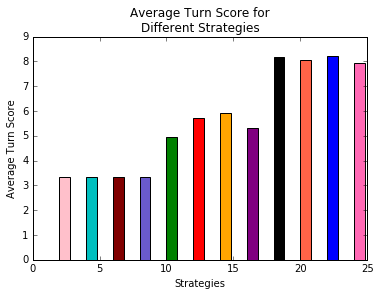

In [27]:
x1 = 2
y1 = four_rolls_y

x2 = 4
y2 = five_rolls_y

x3 = 6
y3 = six_rolls_y

x4 = 8
y4 = seven_rolls_y

x5 = 10
y5 = fifty_percent_y

x6 = 12
y6 = seventy_percent_y

x7 = 14
y7 = eighty_percent_y

x8 = 16
y8 = ninety_percent_y

x9= 18
y9 = optimal_minus_two_y

x10 = 20
y10 = optimal_minus_one_y

x11 = 22
y11 = optimal_y

x12 = 24
y12 = optimal_plus_one_y

plt.bar(x1,y1, color = 'pink',label = "Four Rolls Pig")
plt.bar(x2,y2, color = 'c', label = 'Five Rolls Pig')
plt.bar(x3, y3, color = 'maroon', label = 'Six Rolls Pig')
plt.bar(x4, y4, color = 'slateblue', label = 'Seven Rolls Pig')
plt.bar(x5, y5, color = 'g', label = '50% Pig')
plt.bar(x6, y6, color = 'r', label = '70% Pig')
plt.bar(x7,y7, color = 'orange', label = '80% Pig')
plt.bar(x8, y8, color = 'purple', label = '90% Pig')
plt.bar(x9, y9, color = 'k')
plt.bar(x10, y10, color = 'tomato')
plt.bar(x11, y11, label = 'Optimal Pig')
plt.bar(x12, y12, color = 'hotpink')
plt.xlabel('Strategies')
plt.ylabel('Average Turn Score')
plt.title('Average Turn Score for\nDifferent Strategies')
plt.show()

### Above is a plot of the average turn score for the various strategies in this order: four rolls, five rolls, six rolls, seven rolls, 50% probability of rolling again, 70% probability, 80% probability, 90% probability, hold-at 18, hold-at-19, hold-at-20(optimal), hold-at-21

### Below is a list of the average turn score of each strategy

In [34]:
print('Hold at 20: ',optimal_y)
print('Hold at 18: ', optimal_minus_two_y)
print('Hold at 19: ', optimal_minus_one_y)
print('Hold at 21: ', optimal_plus_one_y)
print('Four Rolls: ', four_rolls_y)
print('Five Rolls: ', five_rolls_y)
print('Six Rolls:  ',six_rolls_y)
print('Seven Rolls:', seven_rolls_y)
print('50%:        ', fifty_percent_y)
print('70%:        ', seven_rolls_y)
print('80%:        ', eighty_percent_y)
print('90%:        ', ninety_percent_y)

Hold at 20:  8.223
Hold at 18:  8.1893
Hold at 19:  8.0477
Hold at 21:  7.9297
Four Rolls:  3.3414
Five Rolls:  3.3528
Six Rolls:   3.3291
Seven Rolls: 3.3222
50%:         4.9586
70%:         3.3222
80%:         5.9232
90%:         5.307
